# HOUSE PRICE ANALYSIS (ADVANCED REGRESSION TECHNIQUES)

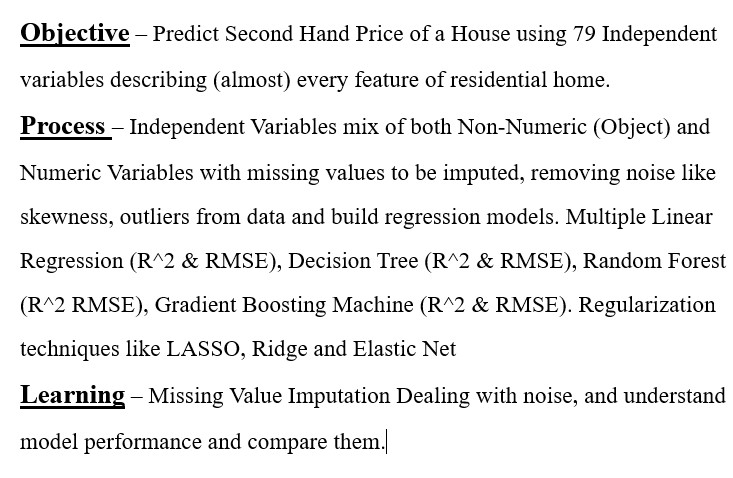

# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Data Set

In [2]:
import io
%cd "C:\Users\sande\OneDrive\Desktop\New folder (2)"

C:\Users\sande\OneDrive\Desktop\New folder (2)


In [3]:
testhouse=pd.read_csv("testhouse.csv")

In [4]:
trainhouse=pd.read_csv("trainhouse.csv")

In [5]:
testhouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [6]:
trainhouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
testhouse['SalePrice']='test'

# Concatenation of both dataframes for preprocessing

In [8]:
combinedf=pd.concat([trainhouse,testhouse],axis=0)

In [9]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [10]:
objcols=combinedf.select_dtypes(include=object)
numcols=combinedf.select_dtypes(include=np.number)

In [11]:
objcols.isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
GarageCond        159
GarageQual        159
GarageFinish      159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MSZoning            4
Utilities           2
Functional          2
Exterior2nd         1
Electrical          1
SaleType            1
Exterior1st         1
KitchenQual         1
RoofStyle           0
Neighborhood        0
SaleCondition       0
ExterQual           0
LotShape            0
LandContour         0
ExterCond           0
PavedDrive          0
LotConfig           0
LandSlope           0
Condition1          0
HouseStyle          0
Condition2          0
Foundation          0
RoofMatl            0
Street              0
CentralAir          0
HeatingQC           0
Heating             0
BldgType            0
SalePrice           0
dtype: int64

In [12]:
objcols.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [13]:
notavailablecols=['Alley','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','FireplaceQu', 'GarageType', 'GarageQual',
       'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

In [14]:
for col in notavailablecols:
    objcols[col]=objcols[col].fillna('Not Available')

In [15]:
for col in objcols.columns:
    objcols[col]=objcols[col].fillna(objcols[col].value_counts().idxmax())

In [16]:
numcols.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

# Data is in Categorical in Numeric Variables so dividing the data in numcols,objcols,catcols

In [17]:
catcols=numcols[[ 'OverallQual','OverallCond','YearBuilt','YearRemodAdd',
                'GarageYrBlt','MoSold', 'YrSold']]

In [18]:
numcols=numcols.drop(['OverallQual','OverallCond','YearBuilt','YearRemodAdd',
                'GarageYrBlt','MoSold', 'YrSold'],axis=1)

In [19]:
objcols.isnull().sum().sort_values(ascending=False)

MSZoning         0
Street           0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
BsmtExposure     0
BsmtCond         0
BsmtQual         0
Condition2       0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
BldgType         0
Foundation       0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
SalePrice        0
dtype: int64

# Missing Value Imputations for Numcols,Objcols,Catcols

In [20]:
for col in numcols.columns:
    numcols[col]=numcols[col].fillna(numcols[col].median())

In [21]:
numcols.describe()

,Id,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.088386,10168.114080,101.396026,441.398253,49.565262,560.739979,1051.756252,1159.581706,...,0.597122,1.766701,472.877013,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968
std,842.787043,42.517628,21.317898,7886.996359,178.854579,455.534750,169.179104,439.471764,440.692234,392.362079,...,0.646129,0.761506,215.357944,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211
min,1.000000,20.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,730.500000,20.000000,60.000000,7478.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,...,0.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1460.000000,50.000000,68.000000,9453.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,...,1.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2189.500000,70.000000,78.000000,11570.000000,163.500000,733.000000,0.000000,805.000000,1302.000000,1387.500000,...,1.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2919.000000,190.000000,313.000000,215245.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,...,4.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000


In [22]:
numcols.isnull().sum().sort_values(ascending=False)

Id               0
MSSubClass       0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
GarageArea       0
GarageCars       0
Fireplaces       0
TotRmsAbvGrd     0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
TotalBsmtSF      0
BsmtUnfSF        0
BsmtFinSF2       0
BsmtFinSF1       0
MasVnrArea       0
LotArea          0
LotFrontage      0
MiscVal          0
dtype: int64

In [23]:
catcols.isnull().sum().sort_values(ascending=False)

GarageYrBlt     159
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MoSold            0
YrSold            0
dtype: int64

In [24]:
# imputing
catcols.GarageYrBlt=catcols.GarageYrBlt.fillna(
    catcols.GarageYrBlt.value_counts().idxmax())

In [25]:
catcols['MSSubClass']=numcols.MSSubClass

In [26]:
numcols=numcols.drop('MSSubClass',axis=1)

# concat all 3 dataframes for EDA

In [27]:
combinedf_EDA=pd.concat([numcols,objcols,catcols],axis=1)

In [28]:
housedf_EDA=combinedf_EDA[combinedf_EDA.SalePrice!='test']

# Exploratory Data Analysis

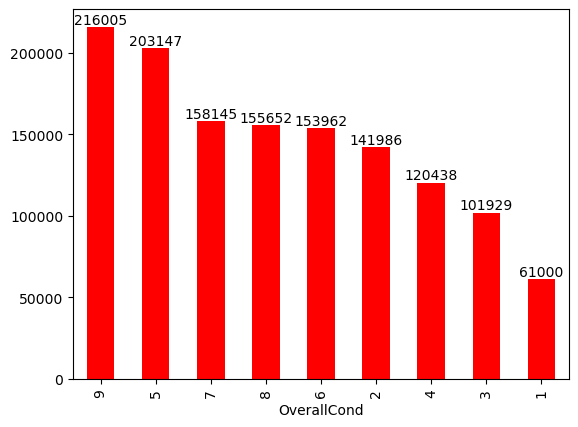

In [29]:
ax=housedf_EDA['SalePrice'].groupby(
housedf_EDA['OverallCond']).mean().sort_values(
ascending=False).plot(kind='bar',color='red')
for i in ax.containers:
    ax.bar_label(i)

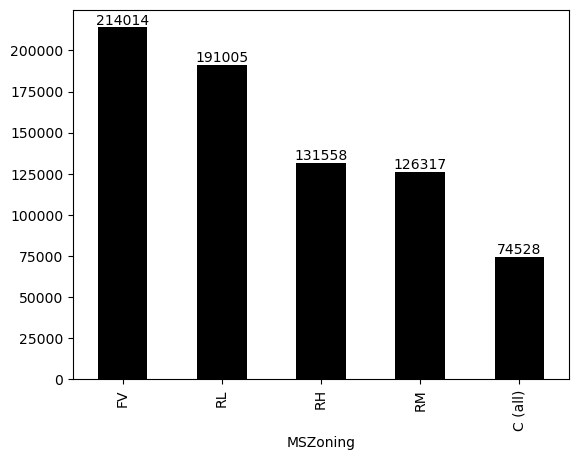

In [30]:
ax=housedf_EDA['SalePrice'].groupby(
housedf_EDA['MSZoning']).mean().sort_values(
ascending=False).plot(kind='bar',color='black')
for i in ax.containers:
    ax.bar_label(i)

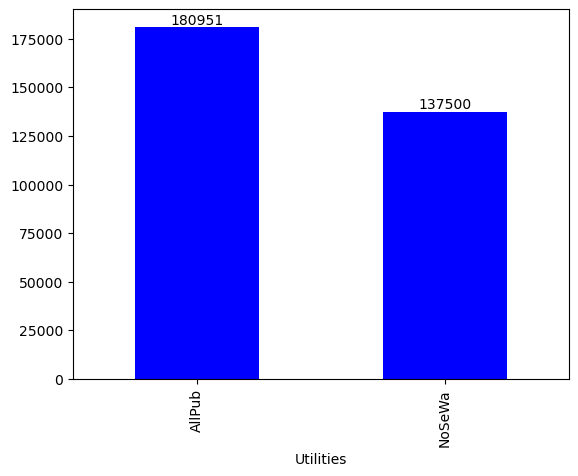

In [31]:
ax=housedf_EDA['SalePrice'].groupby(
housedf_EDA['Utilities']).mean().sort_values(
ascending=False).plot(kind='bar',color='blue')
for i in ax.containers:
    ax.bar_label(i)

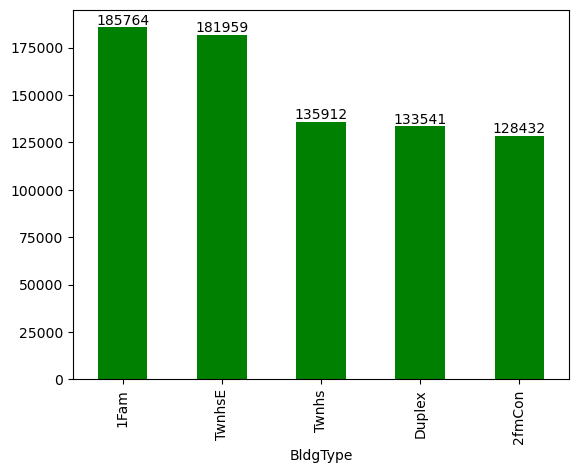

In [32]:
ax=housedf_EDA['SalePrice'].groupby(
housedf_EDA['BldgType']).mean().sort_values(
ascending=False).plot(kind='bar',color='green')
for i in ax.containers:
    ax.bar_label(i)

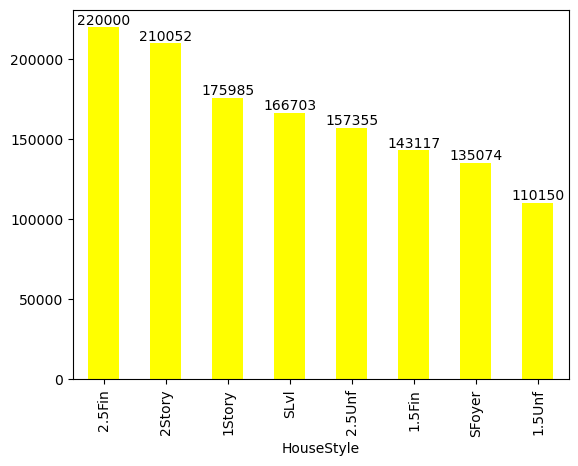

In [33]:
ax=housedf_EDA['SalePrice'].groupby(
housedf_EDA['HouseStyle']).mean().sort_values(
ascending=False).plot(kind='bar',color='yellow')
for i in ax.containers:
    ax.bar_label(i)

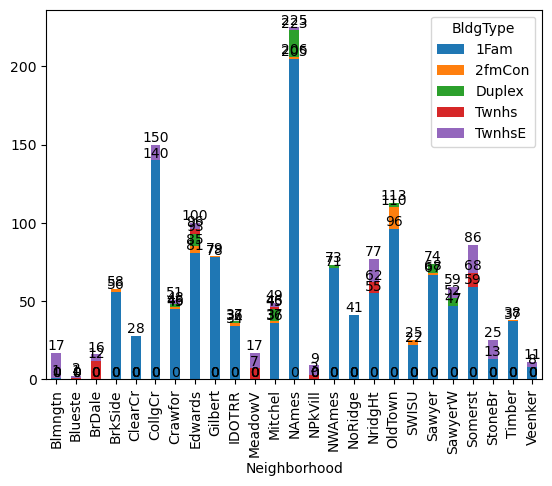

In [34]:
ax=pd.crosstab(housedf_EDA.Neighborhood,housedf_EDA.BldgType).plot(kind='bar',stacked='True')
for i in ax.containers:
    ax.bar_label(i)

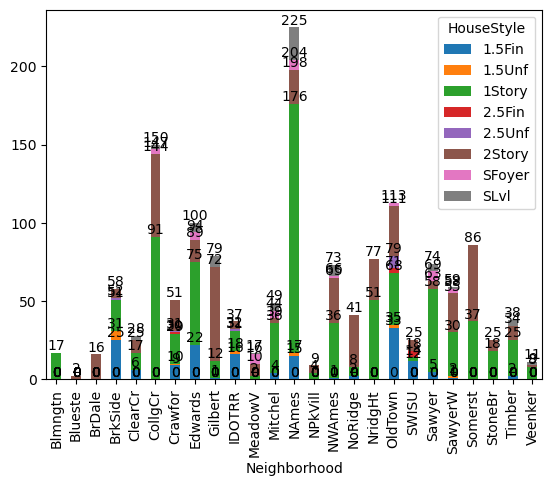

In [35]:
ax=pd.crosstab(housedf_EDA.Neighborhood,housedf_EDA.HouseStyle).plot(kind='bar',stacked='True')
for i in ax.containers:
    ax.bar_label(i)

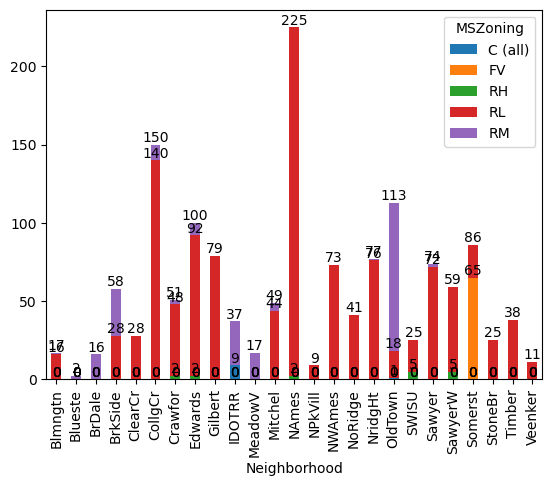

In [36]:
ax=pd.crosstab(housedf_EDA.Neighborhood,housedf_EDA.MSZoning).plot(kind='bar',stacked='True')
for i in ax.containers:
    ax.bar_label(i)

In [ ]:
Hypothesis Testing

In [37]:
# Test Null Average Saleprice of SaleCondition is equal

housedf_EDA.SalePrice.groupby(housedf_EDA.SaleCondition).mean()

SaleCondition
Abnorml    146526.623762
AdjLand    104125.000000
Alloca     167377.416667
Family     149600.000000
Normal     175202.219533
Partial    272291.752000
Name: SalePrice, dtype: float64

In [38]:
from scipy.stats import f_oneway

In [39]:
Abnorml=housedf_EDA[housedf_EDA.SaleCondition=='Abnorml']
AdjLand=housedf_EDA[housedf_EDA.SaleCondition=='AdjLand']
Alloca=housedf_EDA[housedf_EDA.SaleCondition=='Alloca']
Family=housedf_EDA[housedf_EDA.SaleCondition=='Family']
Normal=housedf_EDA[housedf_EDA.SaleCondition=='Normal']
Partial=housedf_EDA[housedf_EDA.SaleCondition=='Partial']

In [40]:
f_oneway(Abnorml.SalePrice,AdjLand.SalePrice,Alloca.SalePrice,Family.SalePrice,Normal.SalePrice,Partial.SalePrice)

# since p value =7.988268404991176e-44 is less than 0.05 is reject null

F_onewayResult(statistic=45.57842830969572, pvalue=7.988268404991176e-44)

In [41]:
numcols.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,1,65.0,8450,196.0,706.0,0.0,150.0,856.0,856,854,...,0,2.0,548.0,0,61,0,0,0,0,0
1,2,80.0,9600,0.0,978.0,0.0,284.0,1262.0,1262,0,...,1,2.0,460.0,298,0,0,0,0,0,0
2,3,68.0,11250,162.0,486.0,0.0,434.0,920.0,920,866,...,1,2.0,608.0,0,42,0,0,0,0,0
3,4,60.0,9550,0.0,216.0,0.0,540.0,756.0,961,756,...,1,3.0,642.0,0,35,272,0,0,0,0
4,5,84.0,14260,350.0,655.0,0.0,490.0,1145.0,1145,1053,...,1,3.0,836.0,192,84,0,0,0,0,0


In [ ]:
Scaling of Numcols

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
numcols_scaled=StandardScaler().fit_transform(numcols)

In [44]:
numcols_scaled=pd.DataFrame(numcols_scaled,columns=numcols.columns)

In [45]:
numcols_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   float64
 1   LotFrontage    2919 non-null   float64
 2   LotArea        2919 non-null   float64
 3   MasVnrArea     2919 non-null   float64
 4   BsmtFinSF1     2919 non-null   float64
 5   BsmtFinSF2     2919 non-null   float64
 6   BsmtUnfSF      2919 non-null   float64
 7   TotalBsmtSF    2919 non-null   float64
 8   1stFlrSF       2919 non-null   float64
 9   2ndFlrSF       2919 non-null   float64
 10  LowQualFinSF   2919 non-null   float64
 11  GrLivArea      2919 non-null   float64
 12  BsmtFullBath   2919 non-null   float64
 13  BsmtHalfBath   2919 non-null   float64
 14  FullBath       2919 non-null   float64
 15  HalfBath       2919 non-null   float64
 16  BedroomAbvGr   2919 non-null   float64
 17  KitchenAbvGr   2919 non-null   float64
 18  TotRmsAb

In [47]:
import seaborn as sns

<Axes: >

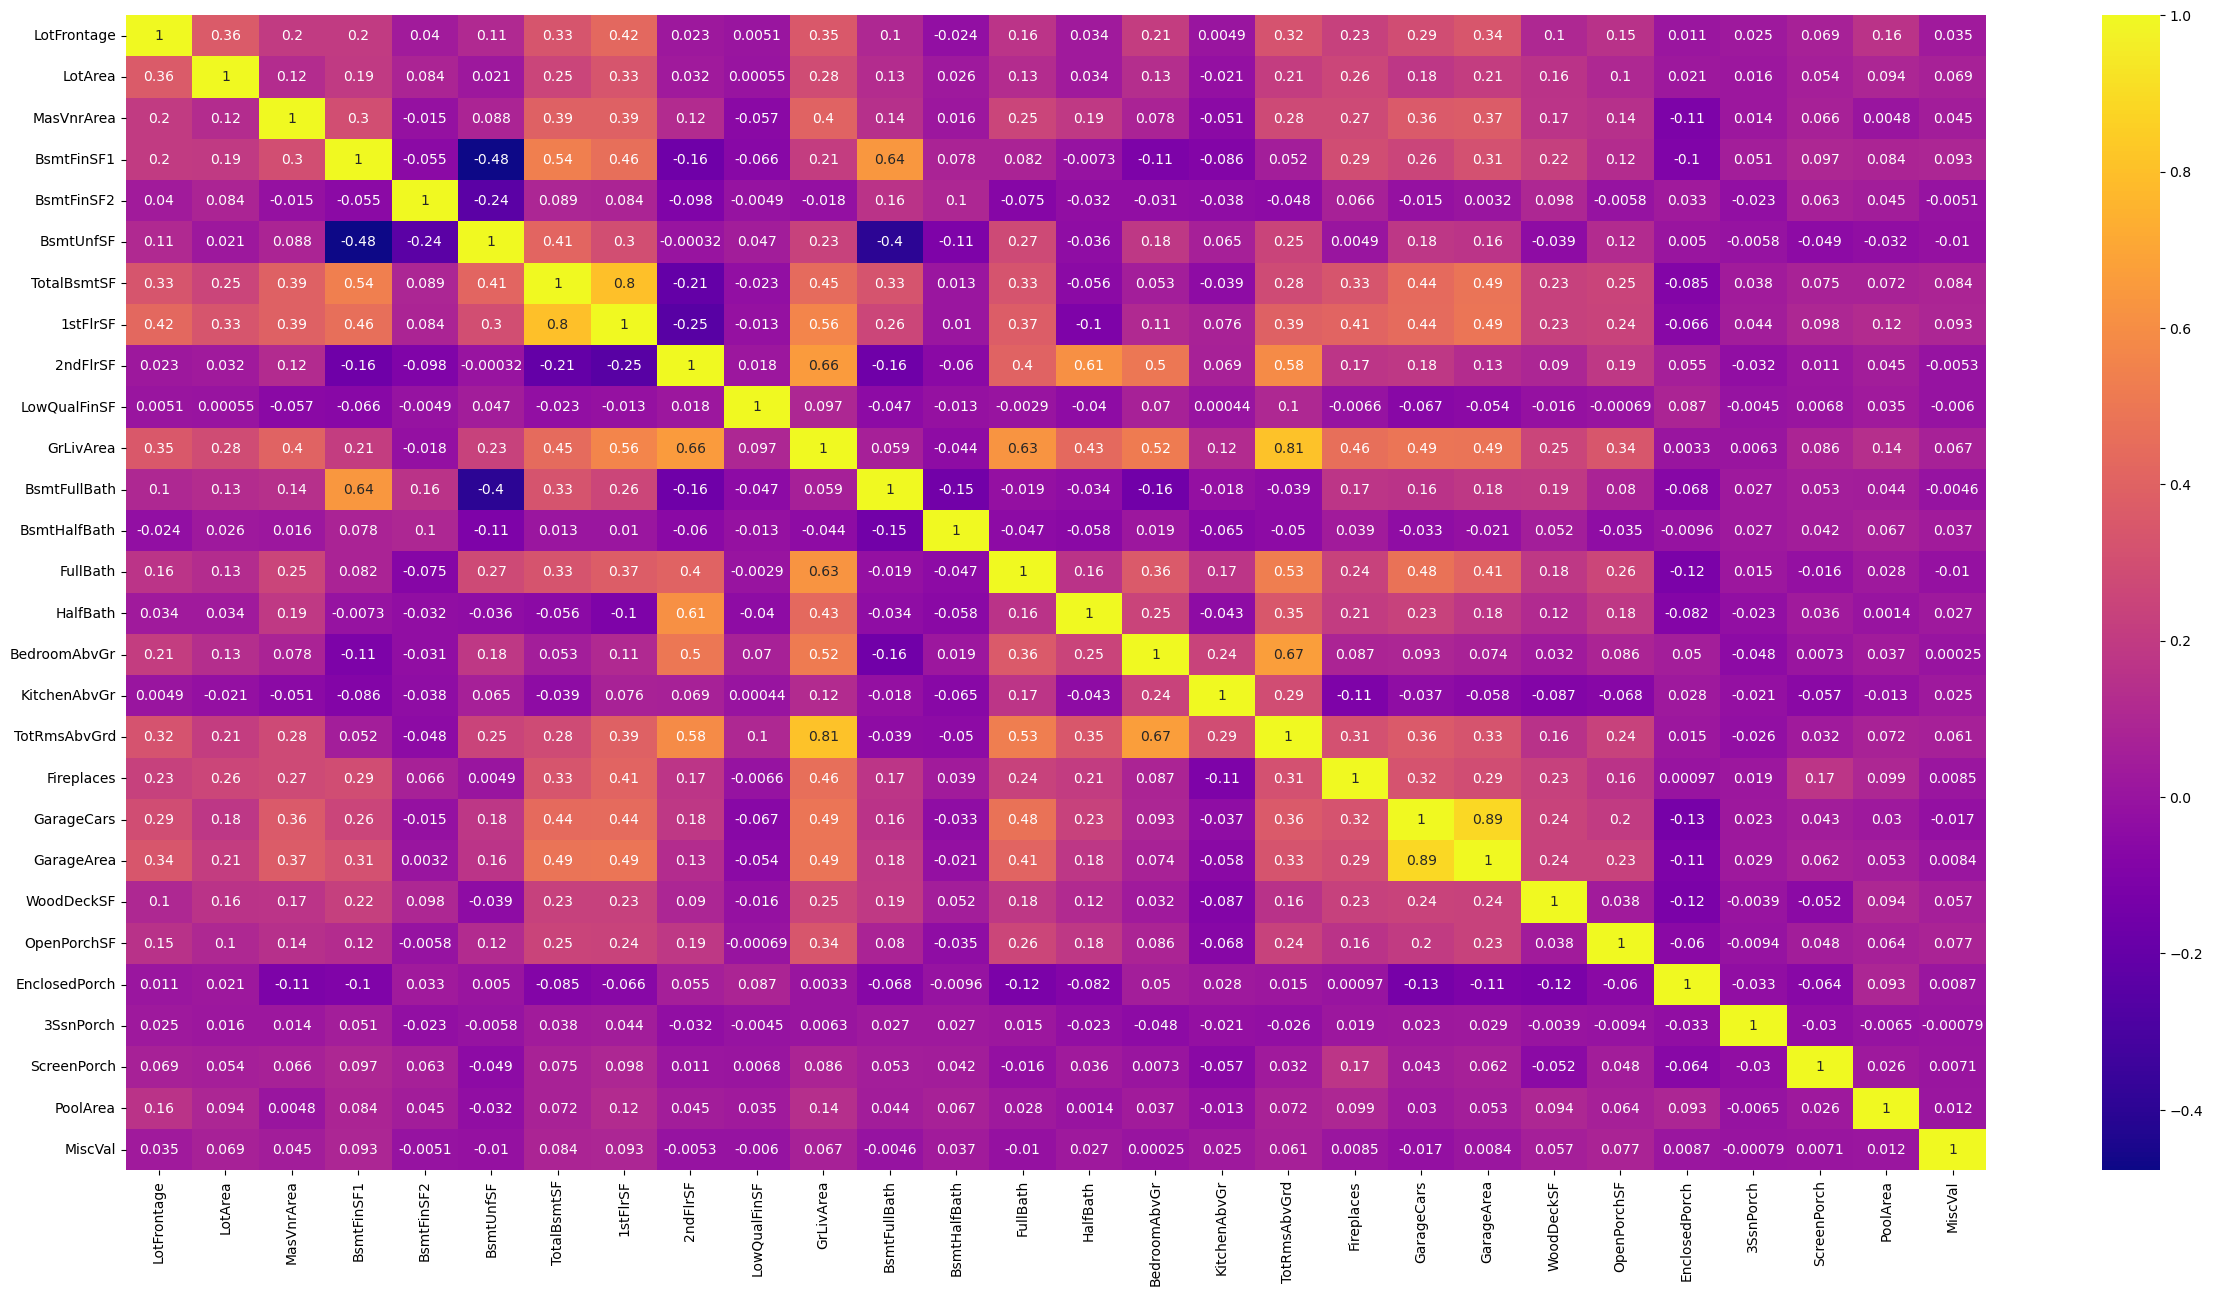

In [48]:
plt.figure(figsize=(30,15))
sns.heatmap(numcols_scaled.drop('Id',axis=1).corr(),annot=True,cmap="plasma")

# Label Encoding for Catcols and Objcols

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
le = LabelEncoder()

In [51]:
objcols = objcols.drop('SalePrice',axis=1)

In [52]:
objcols_encode = objcols.apply(le.fit_transform)

In [53]:
catcols_encode=catcols.apply(LabelEncoder().fit_transform)

In [54]:
numcols_scaled=numcols_scaled.reset_index()

In [55]:
objcols_encode=objcols_encode.reset_index()

In [56]:
catcols_encode=catcols_encode.reset_index()

In [57]:
housedf_clean=pd.concat([numcols_scaled,objcols_encode,catcols_encode],axis=1)

In [58]:
housedf_clean=housedf_clean.reset_index()

In [59]:
combinedf=combinedf.reset_index()

In [60]:
housedf_clean['SalePrice']=combinedf.SalePrice

# Splitting Data in Train and Test

In [61]:
trainhouse=housedf_clean[housedf_clean.SalePrice!='test']
testhouse=housedf_clean[housedf_clean.SalePrice=='test']

In [62]:
testhouse=testhouse.drop('SalePrice',axis=1)

In [63]:
testhouse.head()

,level_0,index,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleCondition,index,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold,MSSubClass
1460,1460,1460,0.001187,0.511940,0.184371,-0.567016,0.058407,0.558290,-0.661680,-0.385270,...,4,0,4,5,68,11,52,5,4,0
1461,1461,1461,0.002373,0.558857,0.519791,0.036930,1.057404,-0.293025,-0.352165,0.629217,...,4,1,5,5,65,8,49,5,4,0
1462,1462,1462,0.003560,0.230438,0.464374,-0.567016,0.767585,-0.293025,-0.964368,-0.280871,...,4,2,4,4,104,48,88,2,4,5
1463,1463,1463,0.004747,0.418106,-0.024109,-0.455174,0.352617,-0.293025,-0.538784,-0.285410,...,4,3,5,5,105,48,89,5,4,5
1464,1464,1464,0.005934,-1.223988,-0.654748,-0.567016,-0.391691,-0.293025,1.038379,0.518010,...,4,4,7,4,99,42,83,0,4,11


# Model Building

In [64]:
y=trainhouse.SalePrice
x=trainhouse.drop('SalePrice',axis=1)

In [65]:
x=x.drop(['level_0','index','Id'],axis=1)

In [66]:
testhouse=testhouse.drop(['level_0','index','Id'],axis=1)

# Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
reg=LinearRegression()

In [69]:
regmodel=reg.fit(x,y)

In [70]:
regmodel.score(x,y)

0.8527323463942547

In [71]:
regpredict=regmodel.predict(x)

In [72]:
regresid=y-regpredict

In [73]:
np.sqrt(np.mean(regresid**2)) # RMSE

30475.98984039549

# Decision Tree Regressor

In [76]:
from sklearn.tree import DecisionTreeRegressor

In [77]:
tree=DecisionTreeRegressor()

In [78]:
treemodel=tree.fit(x,y)

In [79]:
treemodel.score(x,y)

1.0

In [82]:
from sklearn.model_selection import cross_val_score

In [83]:
pd.options.display.float_format = '{:.10f}'.format

In [84]:
pd.DataFrame(cross_val_score(reg,x,y))

,0
0,0.8549970567
1,0.8083409994
2,0.8547804021
3,-815052969062980.3750000000
4,0.6268316429


# Random Forest Regressor

In [85]:
from sklearn.ensemble import RandomForestRegressor

In [86]:
RF=RandomForestRegressor(n_estimators=3000)

In [87]:
RFmodel=RF.fit(x,y)

In [88]:
RFmodel.score(x,y)

0.9824068099574075

In [89]:
cross_val_score(RF,x,y)

array([0.87641141, 0.84497539, 0.87563408, 0.88384488, 0.81969193])

In [90]:
np.mean([0.87535033, 0.84481616, 0.87567758, 0.88420009, 0.81516863])

0.859042558

In [91]:
RFpredict=RFmodel.predict(x)

In [92]:
RFresid=y-RFpredict

In [93]:
np.sqrt(np.mean(RFresid**2))

10533.590562600368

# Gradient Boosting Regressor

In [96]:
from sklearn.ensemble import GradientBoostingRegressor

In [97]:
gb=GradientBoostingRegressor(n_estimators=3000)

In [98]:
gbmodel=gb.fit(x,y)

In [99]:
gbmodel.score(x,y)

0.9999629407716852

# Support Vector Machine

In [102]:
from sklearn.svm import SVR

In [103]:
svm=SVR(C=1e5,kernel='linear')

In [105]:
svmmodel=svm.fit(x,y)

In [106]:
svmmodel.score(x,y)

0.8250207127660271

In [107]:
svm_train_pred=svmmodel.predict(x)

In [108]:
svm_train_resid=y-svm_train_pred

In [109]:
np.sqrt(np.mean(svm_train_resid**2))

33219.83400620443

# K Neighbors Regressor

In [110]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [111]:
knn=KNeighborsRegressor()

In [112]:
k_range=list(range(1,25))
param_grid=dict(n_neighbors=k_range)
grid=GridSearchCV(knn,param_grid,cv=3)

In [113]:
grid_search=grid.fit(x,y)

In [114]:
grid_search.best_params_

{'n_neighbors': 4}

In [115]:
grid_search.best_score_

0.6592109982580309

In [116]:
grid_search.best_estimator_

KNeighborsRegressor(n_neighbors=4)

In [118]:
grid_search.score(x,y)

0.8136231495074646

# Conclusion